<a href="https://colab.research.google.com/github/syedaquib153/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <b><u>Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

**Objective:**

Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

**Importing Libraries**

In [1]:
#Import Packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Mounting Drive**

In [2]:
# Mouting the drive from Google

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upgrading Xlrd**

In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Reading the Excel File**

In [5]:
# Reading the excel file using Pandas dataframe

In [6]:
df = pd.read_excel('/content/drive/MyDrive/excel/default of credit card clients.xls',skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**(1) Description of columns from dataset documentation**

There are 25 variables:
• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default.payment.next.month: Default payment (1=yes, 0=no)

**Understanding The Data**

In [7]:
# Checking rows and columns present in file
df.shape

(30000, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Inference : No Null Values found

In [11]:
df.duplicated('ID').value_counts()

False    30000
dtype: int64

Inference : No Duplicates found

In [12]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Inference : 1-Male , 2-Female .
Female>Male in terms of counts.

In [13]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Inference: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

Educated more in university then in graduate school and highschool


In [14]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Inference: Marital status (1=married, 2=single, 3=others)

Single>Married, Unmarried status is more then married

In [15]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Inference:Age in years. We can see the age of customer from 21years to 70years


# **Explotory Data Analysis**

**Depended Variable**

we have a depended variable which is 'default payment next month'.

In [16]:
# Replacing the 'default payment next month' as a 'Default' for a convinience

In [17]:
df.rename(columns={'default payment next month':'Default'},inplace = True)


**Independent Variables**

***Categorical*** ***Features:***


**Replacing the Numerical Features to Categorical Features**

In [18]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [19]:
#Replacing the Values 
df['EDUCATION']=df['EDUCATION'].replace({5:4,4:4,6:4,0:4})
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Inference: Replaced the Values 4 , 5 , 6 to 0 since we asuumed it as Caterogy 'Others'

In [20]:
df['MARRIAGE']=df['MARRIAGE'].replace({3:3,0:3})
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Inference: Replaced the Values 3 , 0  to 3 since we asuumed it as Caterogy 'Others'

In [21]:
# Replacing the numerical features to categorical features for visualision

In [22]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [23]:
df_cato = df[categorical_features]
df_cato['IsDefault'] = df['Default']

In [24]:
df_cato.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 576x360 with 0 Axes>

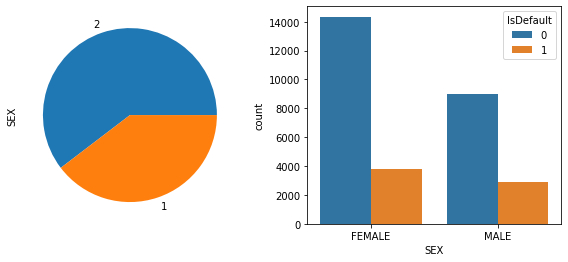

<Figure size 576x360 with 0 Axes>

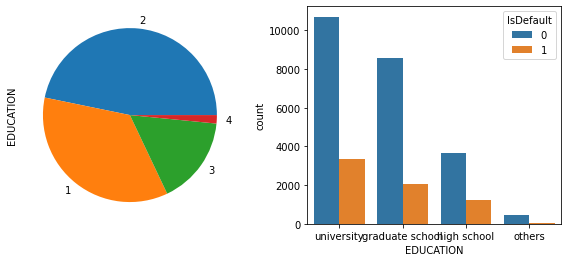

<Figure size 576x360 with 0 Axes>

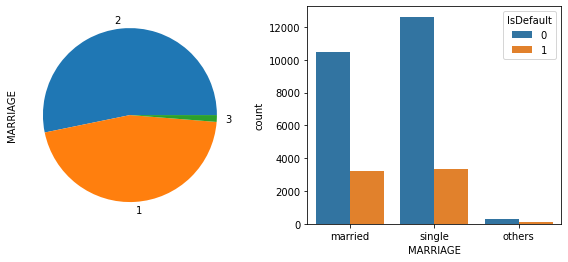

In [25]:
for col in categorical_features:
  plt.figure(figsize=(8,5))
  fig, axes = plt.subplots(ncols=2,figsize=(10,4))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'IsDefault', data = df_cato)

Note: 0- Default , 1-No Default

Inference:


*   There are more proposional of Female candidates with default Values.

*  No of default's are more in Educations (university and Graduates)


  
*    No of default's are more in Single's










***Numerical Features:***

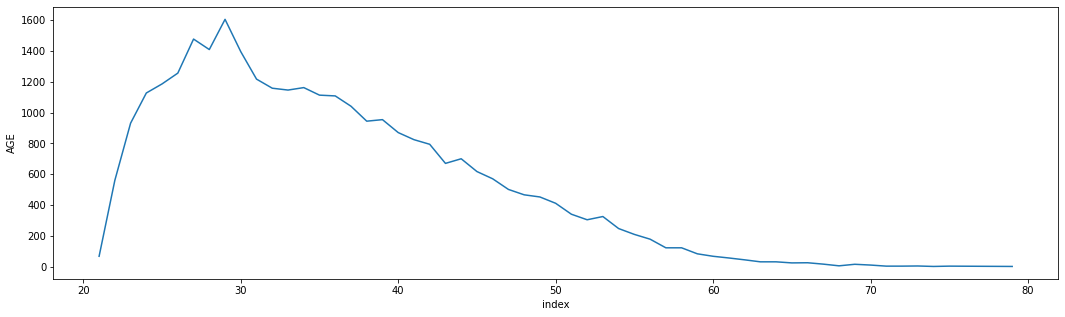

In [26]:
plt.figure(figsize=(18,5))
Age_df=df['AGE'].value_counts().reset_index()
sns.lineplot(x='index',y='AGE',data=Age_df)

Inference: Customer aged between 30 to 40 has more 'No default' rate while from 50 to 80 has more 'default' rate .

In [27]:
#renaming columns 
 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [28]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [29]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Default'],
      dtype='object')

**History of Repayment Status from May to September**

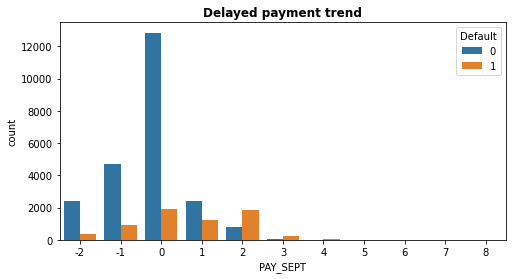

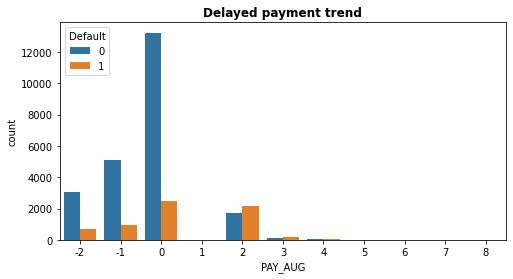

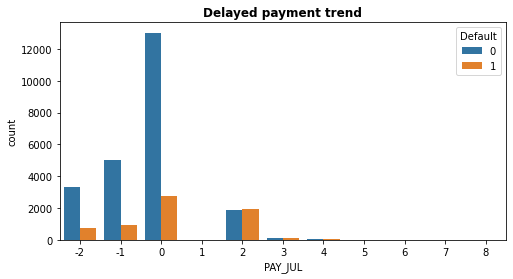

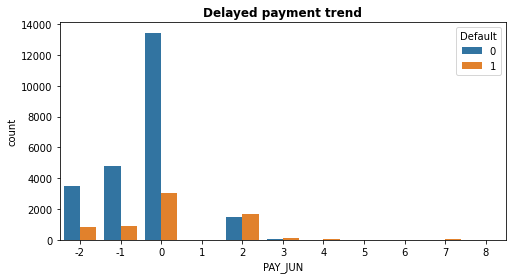

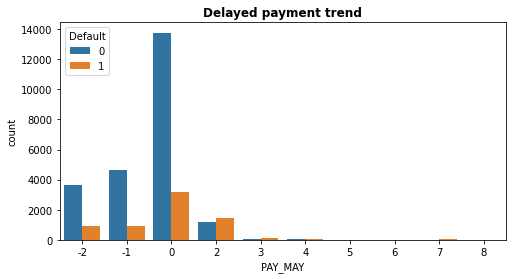

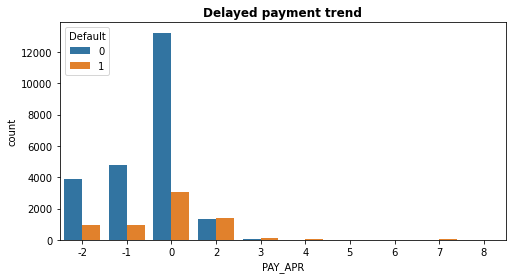

In [30]:
# Checking correlations between Repayment status and default values
columns = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in columns:
  plt.figure(figsize=(8,4))
  sns.countplot(x = col,hue = 'Default',  data = df)
  plt.title('Delayed payment trend',fontweight='bold')



Inference:

Has the repayment status changed in the 6 month from April 2005 (PAY_6) to September 2005(PAY_0)?
There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).

**Bill Amount**

In [31]:
pay_amnt_df = df[['PAY_AMT_SEPT',   'PAY_AMT_AUG',  'PAY_AMT_JUL',  'PAY_AMT_JUN',  'PAY_AMT_MAY',  'PAY_AMT_APR', 'Default']]

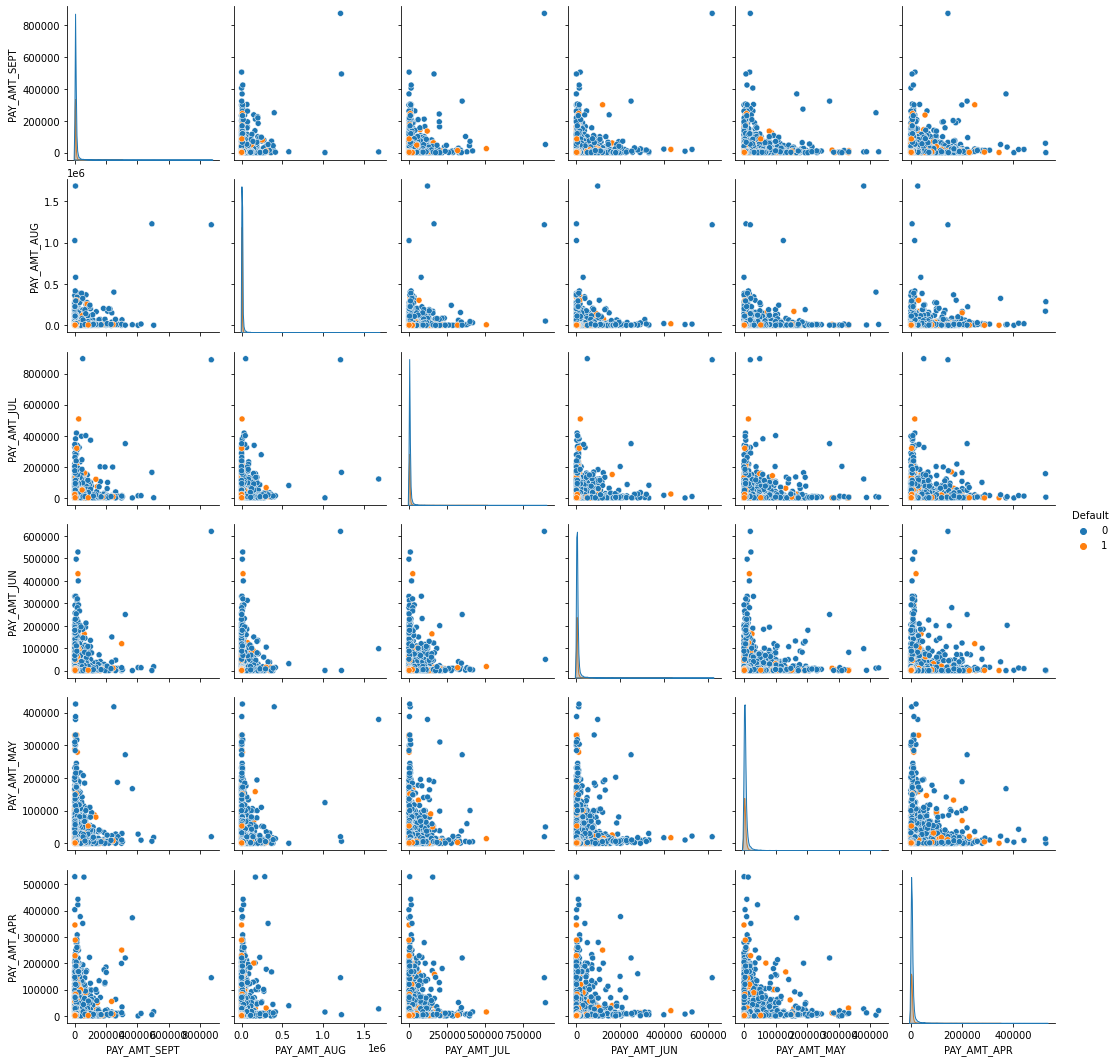

In [32]:
sns.pairplot(data = pay_amnt_df, hue='Default')

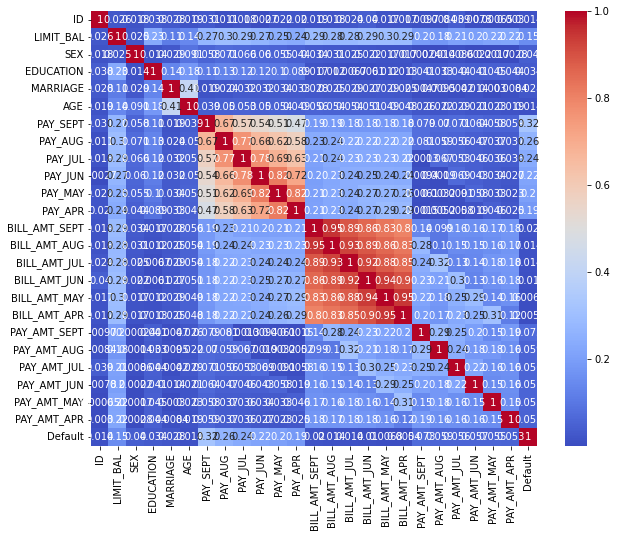

In [33]:
plt.figure(figsize=(10,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Inference: By using heat map for correlation we can see the correlationship of columns to columns

In [34]:
bill =df[['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']]

In [35]:
bill.describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Inference : We can see negative values in min .

# **Statistical Analysis**

*We will use Statistical Analysis to find the correlation between columns*

Correlation between credit limit and bill amount: **Pearson R**

Correlation between credit limit and payment default: **t-test**

Correlation between education and payment default: **chi-squared test**

Correlation between age and payment default: **chi-squared test**

Correlation between sex and payment default: **chi-squared test**


**Correlation between credit limit and bill amount**

We assume customers who have a high credit limit will have a higher bill amount.

In [36]:
#Create the dataframe Limit balance
def0 = df.loc[df['Default'] == 0,'LIMIT_BAL']
def1 = df.loc[df['Default'] == 1,'LIMIT_BAL']

***The Pearson correlation coefficient (r)*** is the most common way of measuring a linear correlation.

 It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.



In [37]:
#imported library 

In [38]:
from scipy import stats

credit_limit = df['LIMIT_BAL']
bill =df[['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']].sum(axis=1)

stats.pearsonr(credit_limit, bill)

(0.30204379702615786, 0.0)

Inference : The Pearson R shows there is a positive correlation between these 2 variables.

**Correlation between credit limit and payment default.**

Ideally, we should have customers' income data, but since this data is not available, we can assume higher income customers have higher credit limits. Therefore, we will verify if there is a correlation between credit limit and default payment using t-test.

Null hypothesis: credit limit does not affect default likelihood.

Alternative hypothesis: credit limit impact default likelihood.

Set significance level alpha to 0.05

In [39]:
no_def_limit = df.loc[df['Default']==0,'LIMIT_BAL']
def_limit = df.loc[df['Default']==1,'LIMIT_BAL']

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html 

**t-test**-This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [40]:
# import libraries of t-test from scipy.stats

In [41]:
from scipy import stats
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=np.mean(no_def_limit),std1=np.std(no_def_limit),nobs1=len(no_def_limit),
                     mean2=np.mean(def_limit),std2=np.std(def_limit),nobs2=len(def_limit))

Ttest_indResult(statistic=26.90935759020854, pvalue=1.2739158026091975e-157)

Inference:We get a p value as 0, therefore we need to reject the null hypothesis and accept the alternative hypothesis. Credit limit has an impact on payment default.

**Correlation between education and payment default.**

Previous visualization indicates education impacts default likelihood. We will use a Chi-squared test to verify this finding.

Null hypothesis: education does not affect default likelihood.

Alternative hypothesis: education impacts default likelihood.

Set significance level alpha to 0.05

**A chi-square test** is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

crosstab(*args[, levels, sparse])

Return table of counts for each possible unique combination in *args.

In [42]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['EDUCATION'], margins=False)

In [43]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

1.495064564810615e-34

Inference: 
Since the p value is close to 0, we will reject the null hypothesis and accept the alternative hypothesis. Because education has a strong correlation with default probability, we should keep this variable in the machine learning model.

***Correlation between age and payment default.***

Previous visualization indicates age impacts default likelihood. We will use a chi-squared test to verify this finding.


Null hypothesis: age does not affect default likelihood.

Alternative hypothesis: age impacts default likelihood.

Set significance level  to 0.05

In [44]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['AGE'], margins=False)

In [45]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

5.6429915495725416e-12

Inference: The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is age has impact on default probability.

**Correlation between sex and payment default.**

Null hypothesis: sex has no impact on default probability.

Alternative hypothesis: sex has impact on default probability.

Set significance level  to 0.05.


In [46]:
# Get the contigence table of education and default data

edu_def_contigence = pd.crosstab(df['Default'], df['SEX'], margins=False)

In [47]:
# Use Chi-squared test to test if education affects default likelihood.

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_def_contigence)

p

4.944678999412044e-12

Inference: The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis, which is Sex has impact on default probability.

**Checking data Imbalance**

In [48]:
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

Inference: A data is a Imbalanced data

# As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using **SMOTE(Synthetic Minority Oversampling Technique)**

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [49]:
#Importing Libraries 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# splitting the data 
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [50]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19983,240000,1,1,2,31,-1,-1,0,-1,...,1482,1796,1836,2152,1169,1349,1796,1053,2152,1243
46724,707,20000,2,2,1,30,3,2,0,0,...,19101,11809,11876,11863,0,1074,320,572,527,843
46725,5540,20000,1,1,2,31,1,0,0,-2,...,0,0,0,0,4518,0,0,0,0,0
46726,12640,451670,2,2,1,38,0,-1,-1,-1,...,3079,1275,1747,-47145,1059,3079,1275,1747,0,65377


In [51]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Default, Length: 46728, dtype: int64

In [52]:
columns = list(df.columns)
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'Default']

In [53]:
columns.pop()

'Default'

**Independent variable**

In [54]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19983,240000,1,1,2,31,-1,-1,0,-1,...,1482,1796,1836,2152,1169,1349,1796,1053,2152,1243
46724,707,20000,2,2,1,30,3,2,0,0,...,19101,11809,11876,11863,0,1074,320,572,527,843
46725,5540,20000,1,1,2,31,1,0,0,-2,...,0,0,0,0,4518,0,0,0,0,0
46726,12640,451670,2,2,1,38,0,-1,-1,-1,...,3079,1275,1747,-47145,1059,3079,1275,1747,0,65377


**Dependent Variable**

In [55]:
balance_df['Default'] = y_smote

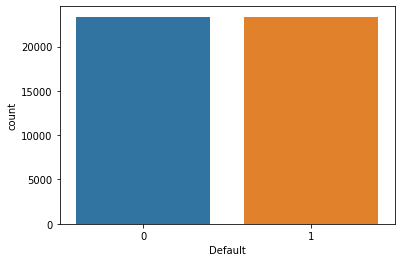

In [56]:
sns.countplot('Default', data = balance_df)

**Feature Engineering**

In [57]:
# create new data frame and make copy of Balance data
new_df =balance_df.copy()
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19983,240000,1,1,2,31,-1,-1,0,-1,...,1796,1836,2152,1169,1349,1796,1053,2152,1243,1
46724,707,20000,2,2,1,30,3,2,0,0,...,11809,11876,11863,0,1074,320,572,527,843,1
46725,5540,20000,1,1,2,31,1,0,0,-2,...,0,0,0,4518,0,0,0,0,0,1
46726,12640,451670,2,2,1,38,0,-1,-1,-1,...,1275,1747,-47145,1059,3079,1275,1747,0,65377,1


In [58]:
# combined all payment values and made a another column called Payment_Value

In [59]:
new_df['Payment_Value'] = new_df['PAY_SEPT'] + new_df['PAY_AUG'] + new_df['PAY_JUL'] + new_df['PAY_JUN'] + new_df['PAY_MAY'] + new_df['PAY_APR']
new_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default,Payment_Value
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,-2
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,3
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,-2


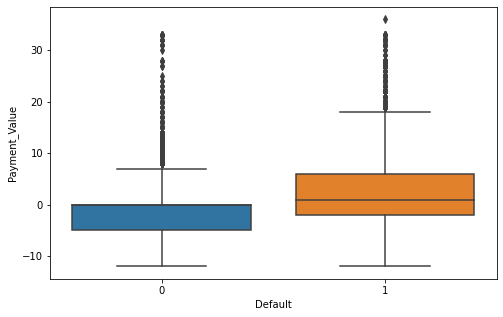

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(data =new_df, x = 'Default', y = 'Payment_Value' )

Inference: We can few outlier inthe frame

In [61]:
new_df['Dues'] = (new_df['BILL_AMT_APR']+new_df['BILL_AMT_MAY']+new_df['BILL_AMT_JUN']+new_df['BILL_AMT_JUL']+ new_df['BILL_AMT_AUG'] + new_df['BILL_AMT_SEPT'])-( new_df['PAY_AMT_APR']+ new_df['PAY_AMT_MAY']+ new_df['PAY_AMT_JUN']+ new_df['PAY_AMT_JUL']+ new_df['PAY_AMT_AUG']+ new_df['PAY_AMT_SEPT'])
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Default,Payment_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19983,240000,1,1,2,31,-1,-1,0,-1,...,2152,1169,1349,1796,1053,2152,1243,1,-4,1369
46724,707,20000,2,2,1,30,3,2,0,0,...,11863,0,1074,320,572,527,843,1,5,90622
46725,5540,20000,1,1,2,31,1,0,0,-2,...,0,4518,0,0,0,0,0,1,-5,32423
46726,12640,451670,2,2,1,38,0,-1,-1,-1,...,-47145,1059,3079,1275,1747,0,65377,1,-5,-111350


Inference = The amount of Dues of a customer

In [62]:
#checking mean of a Dues 
# 0 = No default , 1 = Default
new_df.groupby('Default')['Dues'].mean()

Default
0    237459.487203
1    239585.834361
Name: Dues, dtype: float64

Inference: Dues values are more inthe default's one

**One Hot Encoding**

In [63]:
new_df = pd.get_dummies(new_df,columns=['EDUCATION','MARRIAGE'])
new_df

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Default,Payment_Value,Dues,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,1,-2,7015,0,1,0,0,1,0,0
1,2,120000,2,26,-1,2,0,0,0,2,...,1,3,12077,0,1,0,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,0,0,90635,0,1,0,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,...,0,0,222946,0,1,0,0,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,0,-2,50290,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,19983,240000,1,31,-1,-1,0,-1,0,-1,...,1,-4,1369,1,0,0,0,0,1,0
46724,707,20000,2,30,3,2,0,0,0,0,...,1,5,90622,0,1,0,0,1,0,0
46725,5540,20000,1,31,1,0,0,-2,-2,-2,...,1,-5,32423,1,0,0,0,0,1,0
46726,12640,451670,2,38,0,-1,-1,-1,-1,-1,...,1,-5,-111350,0,1,0,0,1,0,0


In [64]:
# Dropping the columns 'EDUCATION_3' and 'MARRIAGE_3' since we have only Zero values
new_df.drop(['EDUCATION_3','MARRIAGE_3'],axis = 1, inplace = True)

In [65]:
# get dummies for columns
new_df = pd.get_dummies(new_df, columns = ['PAY_SEPT',    'PAY_AUG',  'PAY_JUL',  'PAY_JUN',  'PAY_MAY',  'PAY_APR'], drop_first = True )

In [66]:
new_df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,2,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,2,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [67]:
new_df.drop('ID',axis = 1, inplace = True)

# **Classification Predictive Modeling**

**Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.



In [68]:
# create a new data frame and copy the dataframe
df_log_reg = new_df.copy()
df_log_reg.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'Default', 'Payment_Value', 'Dues',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_1', 'PAY

In [69]:
#independent Variable
#Dropping few columns
x=df_log_reg.drop(['Default','Payment_Value','Dues'],axis = 1)
x.head(2)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
y=df_log_reg['Default']
y.head(2)

0    1
1    1
Name: Default, dtype: int64

Import libraries

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

**StandardScaler** removes the mean and scales each feature/variable to unit variance

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [73]:
#splitting the data for trin and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [74]:
#parameter grids 
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [75]:
#used gridsearchcv for Hypertunning 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [76]:
# optimized _ clf is a cost function
optimized_clf = grid_lr_clf.best_estimator_
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [77]:
optimized_clf

LogisticRegression(C=0.01)

Inference: From gridsearchcv best params = C:1 and penalty:12

In [78]:
grid_lr_clf.best_score_

0.7509501958041008

Inference : The best score accuracy is 75%

In [79]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [80]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [81]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7523237614590986
The accuracy on test data is  0.7537773166461319


Inference: The accuracy on train and test data is 75% 

In [82]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)
 
print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7537773166461319
The precision on test data is  0.6914396887159533
The recall on test data is  0.7898947992295154
The f1 on test data is  0.7373953938723286
The roc_score on test data is  0.7577818092088536


In [83]:
train_roc_score_lr = roc_auc_score(train_class_preds,y_train)
train_roc_score_lr

0.7565110963445489

Inference : After fine-tuning parameter C, Logistic Regression model got ROC_AUC training score as 0.75, and original score 
0.75. This could mean model is fitting the training data.

The business nature of credit card default analysis requires model to have a high recall. Logstic Regression model has a recall as 0.7876. 

[[12776  2877]
 [ 4877 10777]]


[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

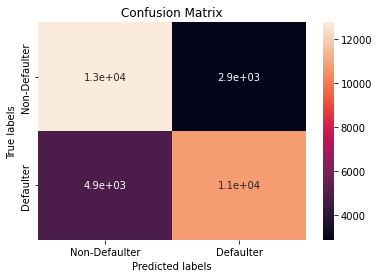

In [84]:
# Get the confusion matrix for both train and test
 
labels = ['Non-Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
 
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Inference:


*   True positive: 12767 (upper-left) – Number of positives we predicted correctly
*   True negative: 10779(lower-right) – Number of negatives we predicted correctly


*   False positive: 2891 (top-right) – Number of positives we predicted wrongly
* False negative:  4875(lower-left) – Number of negatives we predicted wrongly





In [85]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

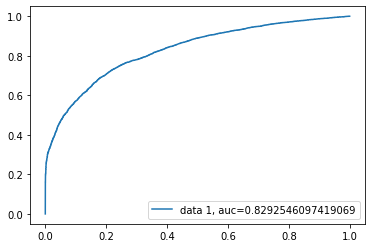

In [86]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Inference: We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter.

**Decision Tree**

Notes:
Decision Trees are a supervised learning method used for classification and regression
How it works:

The ID3 algorithm begins with the original set {S} S as the root node

On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute

It then selects the attribute which has the smallest entropy (or largest information gain) value.

The set is then split by the selected attribute to produce subsets of the data.

The algorithm continues to recurse on each subset, considering only attributes never selected before.

In [87]:
#Import Libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz


 In data science, one use of Graphviz is to visualize decision trees.

In [88]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
# create a new data frame and copy the dataframe
dt = new_df.copy()
dt.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'Default', 'Payment_Value', 'Dues',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_1', 'PAY

In [90]:
#independent Variable
#Dropping few columns
X=dt.drop(['Default','Payment_Value','Dues'],axis = 1)
X.head(2)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
y=dt['Default']
y.head(2)

0    1
1    1
Name: Default, dtype: int64

In [92]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [93]:
#Fit on train set
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [94]:
y_predicted = dt.predict(X_test)

In [95]:
y_test[:10]

34056    1
26760    0
8346     0
18977    0
14585    1
23401    1
37825    1
8420     0
46209    1
22480    0
Name: Default, dtype: int64

In [96]:
accuracy_score(y_test, y_predicted)

0.6382206082614617

Hypertunning

In [97]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [98]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [99]:
grid_DTC_clf.best_score_

0.7120134045107824

In [100]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_
optimal_DTC_clf

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [101]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [102]:
y_preds_proba_DT = optimal_DTC_clf.predict_proba(X_test)[::,1]
y_preds_proba_DT

array([0.79598051, 0.21571072, 0.26498288, ..., 0.38469353, 0.12301918,
       0.12301918])

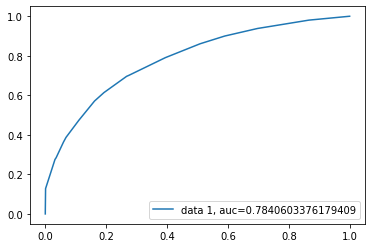

In [103]:
y_pred_proba_ = y_preds_proba_DT
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_)
auc = roc_auc_score(y_test, y_pred_proba_)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [104]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.500527038681445
The accuracy on test data is  0.4983464107386032


Inference : Since a Decision Tree performance is only 50% . We ll see another model

**Visualisation for Decision Tree**

In [105]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

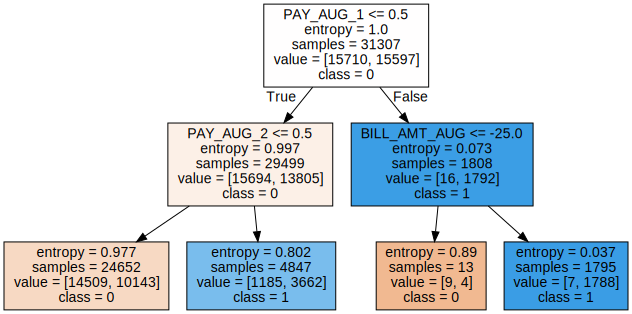

In [106]:
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
df_rf = new_df.copy()

In [109]:
#independent Variable
#Dropping few columns
x=df_rf.drop(['Default','Payment_Value','Dues'],axis = 1)
x.head(2)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0


In [110]:
y=df_log_reg['Default']
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [111]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
#predicting the model
train_class_pred = rf_clf.predict(X_train)
test_class_pred = rf_clf.predict(X_test)

In [113]:
#Get the accuracy score
train_accuracy_rf =  accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

In [114]:
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.500527038681445
The accuracy on test data is  0.4983464107386032


In [115]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)
 
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.4983464107386032
The precision on test data is  0.436461954422557
The recall on test data is  0.5022966365387465
The f1 on test data is  0.4670708184072747
The roc_score on test data is  0.49878438838007433


Inference: we are getting accuracy of 50% for test and train data. we ll hypertune the parameter

Hypertunning

In [116]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [117]:
grid_rf_clf.best_score_

0.7469255796268479

In [118]:
grid_rf_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [119]:
optimal_rf_clf = grid_rf_clf.best_estimator_
optimal_rf_clf

RandomForestClassifier(max_depth=20, min_samples_split=0.1)

In [120]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [121]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
 
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.7486824032963874
The accuracy on test data is  0.7493677452824071


In [122]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)
 
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.7493677452824071
The precision on test data is  0.7029741212823484
The recall on test data is  0.7779994300370476
The f1 on test data is  0.738586405140345
The roc_score on test data is  0.7517273123052072


In [123]:
len(optimal_rf_clf.feature_importances_)

80

Inference: Random forest after hypertunning its getting best F-1 score of 83% which is  good and accuracy for test data is also 83% whcih means a model  performance is very  good.

Random forest with hypertunning parameter performances well

[[12528  3182]
 [ 4686 10911]]


[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

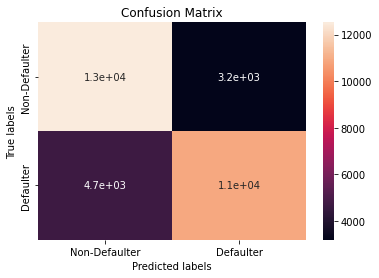

In [124]:
# Get the confusion matrix for both train and test
 
labels = ['Non-Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
 
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Inference: Type -1 and Type -2 error has reduced .

In [125]:
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [126]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]
y_preds_proba_rf

array([0.56629997, 0.28771   , 0.31788135, ..., 0.39034206, 0.22307785,
       0.33632953])

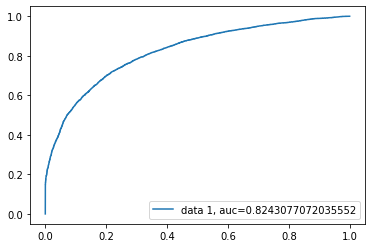

In [127]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**K – Nearest Neighbor (KNN)**

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
df_knn = new_df.copy()

In [130]:
#independent Variable
#Dropping few columns
x=df_knn.drop(['Default','Payment_Value','Dues'],axis = 1)
x.head(2)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,2,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0


In [131]:
y=df_knn['Default']
#split the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [132]:

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski.


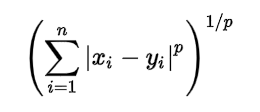

As per the equation, we have to select the p-value also.
p = 1 , Manhattan Distance
p = 2 , Euclidean Distance
p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also u can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set

In [133]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [134]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [135]:
print(cm)
print(ac)

[[4735 2919]
 [1264 6503]]
0.7287465144932235


In [136]:
test_accuracy_knn = accuracy_score(y_pred,y_test)
test_precision_score_knn = precision_score(y_pred,y_test)
test_recall_score_knn = recall_score(y_pred,y_test)
test_f1_score_knn = f1_score(y_pred,y_test)
test_roc_score_knn = roc_auc_score(y_pred,y_test)
 
print("The accuracy on test data is ", test_accuracy_knn)
print("The precision on test data is ", test_precision_score_knn)
print("The recall on test data is ", test_recall_score_knn)
print("The f1 on test data is ", test_f1_score_knn)
print("The roc_score on test data is ", test_roc_score_knn)

The accuracy on test data is  0.7287465144932235
The precision on test data is  0.8372602034247457
The recall on test data is  0.6901931649331352
The f1 on test data is  0.7566466926522775
The roc_score on test data is  0.739745690651265


Inference: Knn accuracy is 73% and its F-1 score for Knn is 75% . it means a model performance is good

**AUC for Best Models**

In [137]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf),(optimal_DTC_clf,y_pred_proba_)]
 
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
 
# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
 
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

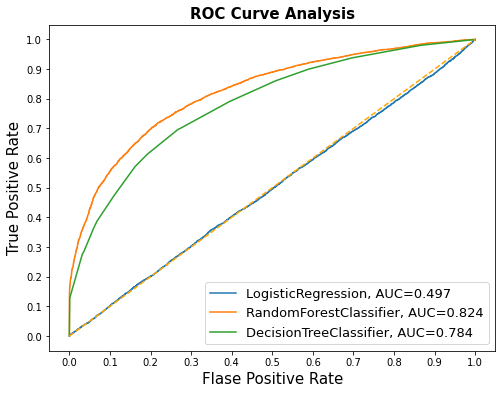

In [138]:
fig = plt.figure(figsize=(8,6))
 
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
 
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
 
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
 
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
 
plt.show()

# **Conclusion**
Logistic Regression model has the highest recall but the lowest precision, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.